In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("train.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Basic 
a) How many passengers are in the training data? 

In [7]:
print(df['PassengerId'].nunique())

891


b) Plot the distribution of the following qualities: Ticket class, sex, and port of 
embarkation?

Text(0.5, 1.0, 'Sex Distribution of Passengers')

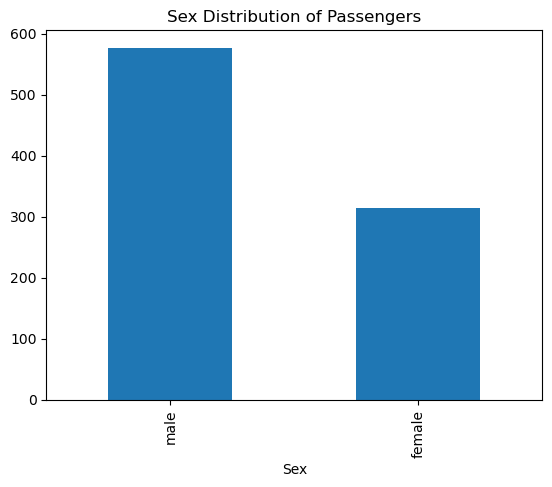

In [13]:
df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Distribution of Passengers')

Text(0.5, 1.0, 'Ticket class Distribution of Passengers')

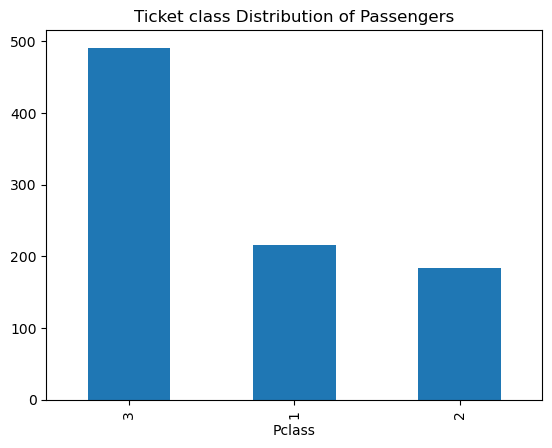

In [15]:
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Ticket class Distribution of Passengers')

Text(0.5, 1.0, 'Port of embarkation Distribution of Passengers')

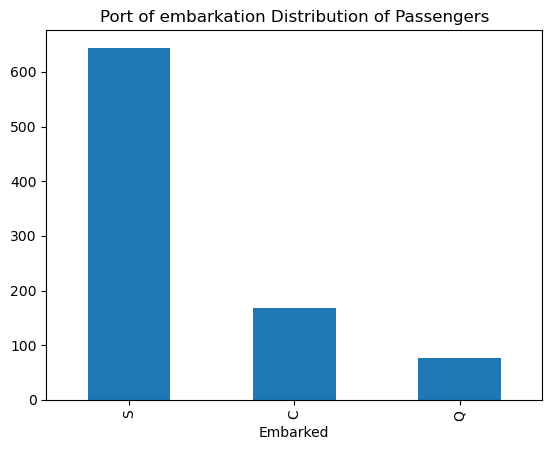

In [16]:
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Port of embarkation Distribution of Passengers')

c) What is the mean, upper/lower quantile, and standard deviation of age and fare?

In [18]:
df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


d) Plot the distribution of the number of siblings/spouses aboard the titanic. Do you 
find anything interesting for >5? 

Text(0.5, 1.0, 'Number of Siblings/Spouses on board')

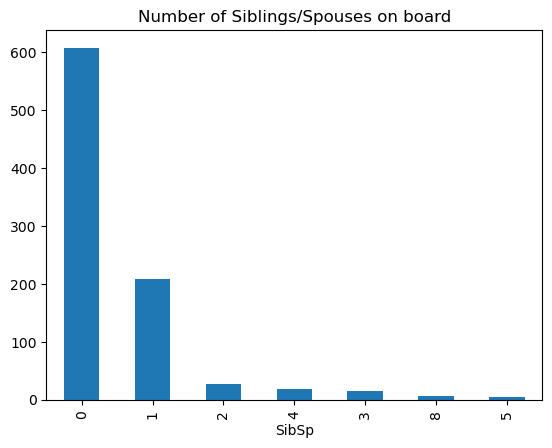

In [28]:
df['SibSp'].value_counts().plot(kind='bar')
plt.title('Number of Siblings/Spouses on board')

Very few passengers with >5 siblings/spouses

### Advanced 
a) How many unique cabins there are for each cabin type (i.e. A to T)?

Text(0.5, 1.0, 'Number of Unique Cabins by Cabin Type')

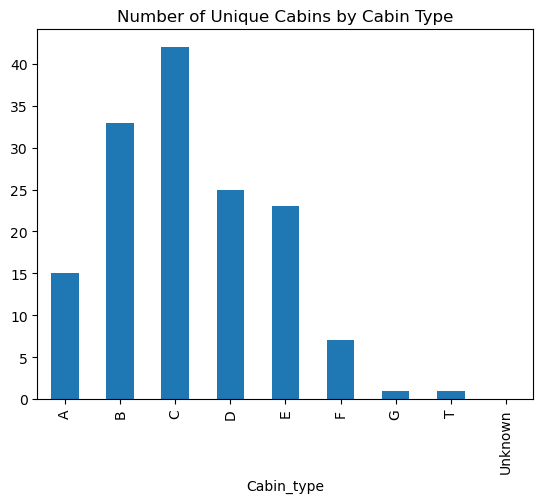

In [22]:
df['Cabin_type'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')
cabin_counts= df.groupby("Cabin_type")['Cabin'].nunique()
cabin_counts.plot(kind='bar')
plt.title('Number of Unique Cabins by Cabin Type')

b) Please rank the cheapness of the cabin by its starting alphabet. (e.g. C128 is “C”, 
A6 is “A”).

Text(0.5, 1.0, 'Price of tickets by Cabin Type')

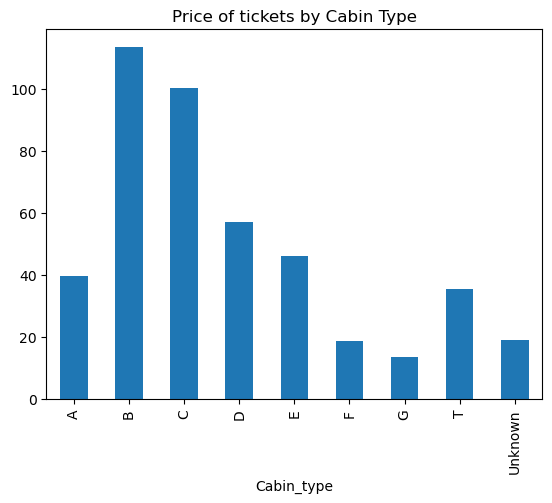

In [21]:
df.groupby("Cabin_type")['Fare'].mean().plot(kind='bar')
plt.title('Price of tickets by Cabin Type')

c) Does the cabin alphabet or the cabin number affect the survival rate? 

Text(0.5, 1.0, 'Survival Rate by cabin type')

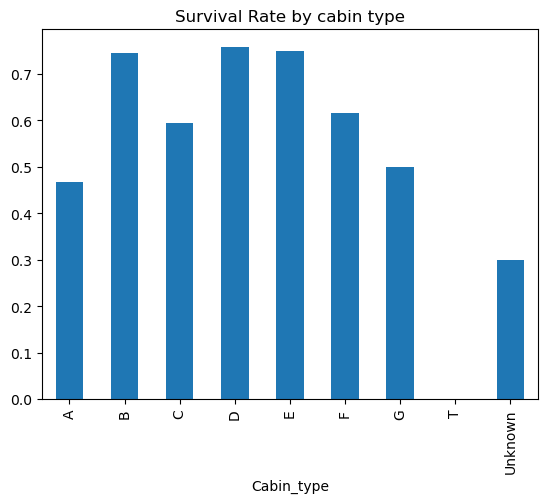

In [26]:
df.groupby("Cabin_type")["Survived"].mean().plot(kind='bar')
plt.title('Survival Rate by cabin type')

Passengers with cabin types B, D, E have the highest survival rate while those of types T, A and G have the lowest survival rates

Text(0.5, 1.0, 'Survival Rate by Number of Unique Cabins')

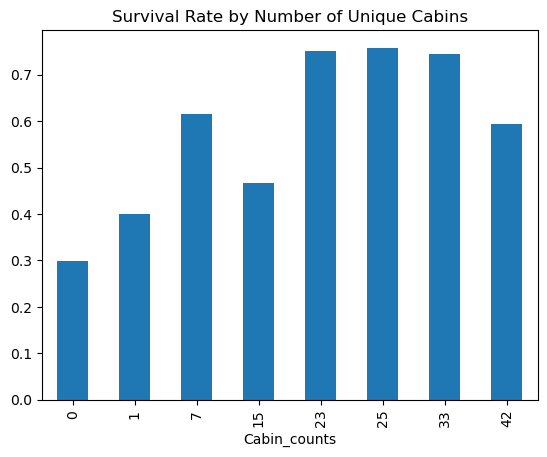

In [24]:
df['Cabin_counts']= df.groupby("Cabin_type")['Cabin'].transform('nunique')
df.groupby("Cabin_counts")["Survived"].mean().plot(kind='bar')
plt.title('Survival Rate by Number of Unique Cabins')

The general trend is the more number of cabins for a cabin type, the higher the survival rate for the passengers 

Text(0.5, 1.0, 'Survival Rate by Sex')

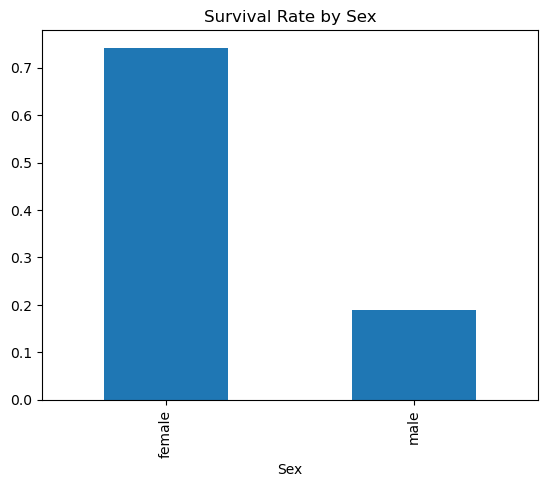

In [29]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')

More females survive than males. 

Text(0.5, 1.0, 'Survival Rate by Age')

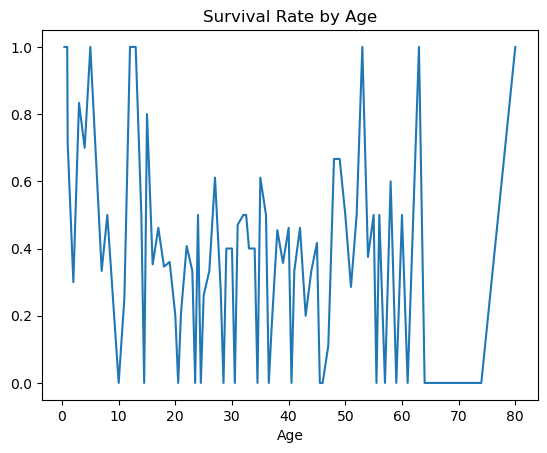

In [31]:
df.groupby('Age')['Survived'].mean().plot(kind='line')
plt.title('Survival Rate by Age')

There is higher survival rate for passengers aged below 20 or above 50. 

Text(0.5, 1.0, 'Survival Rate by Age')

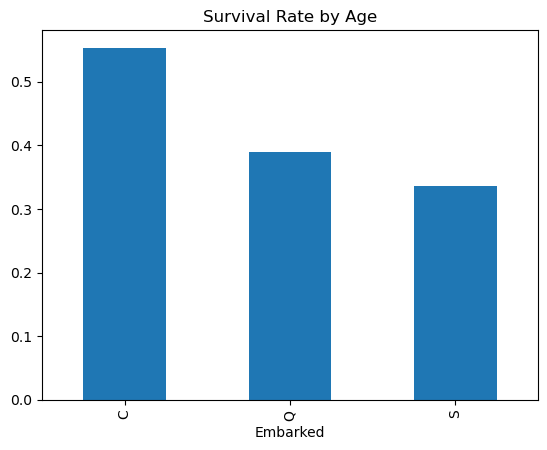

In [34]:
df.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Age')

Passengers who embarked at C had the highest survival rate, followed by Q and then S. 

Text(0.5, 1.0, 'Survival Rate by Number of Siblings/Spouses Aboard')

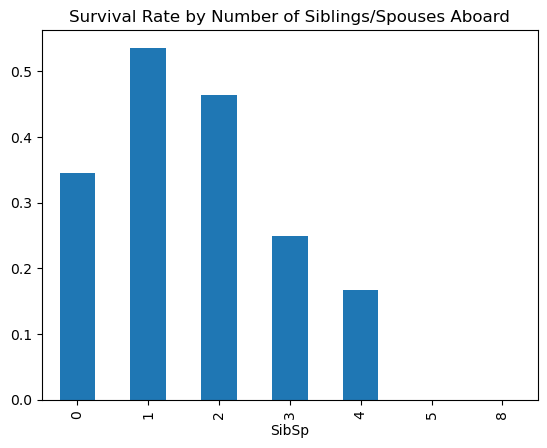

In [ ]:
df.groupby('SibSp')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')

When the number of siblings/spouses increase starting from 1, the survival rate decreases. The survival rate of passengers with >5 siblings/spouses are nearly 0. 

### Visualization & More

Sex
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

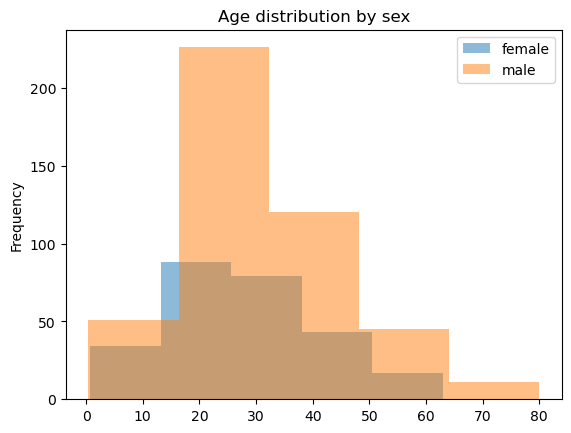

In [50]:
df.groupby('Sex')['Age'].plot.hist(alpha=0.5, bins=5, legend=True, title='Age distribution by sex')

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Fare, dtype: object

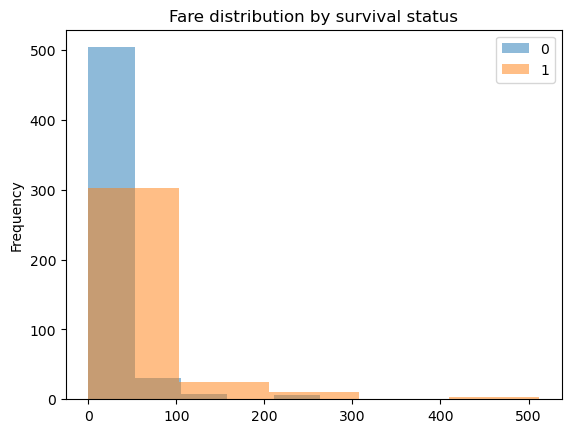

In [39]:
df.groupby('Survived')['Fare'].plot.hist(alpha=0.5, bins=5, legend=True, title='Fare distribution by survival status')

Text(0.5, 1.0, 'Number of Parents/Children Aboard')

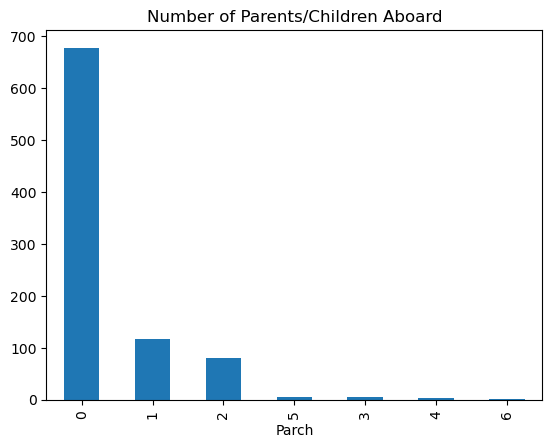

In [41]:
df['Parch'].value_counts().plot(kind='bar')
plt.title('Number of Parents/Children Aboard')

Text(0.5, 1.0, 'Number of Siblings/Spouses on board')

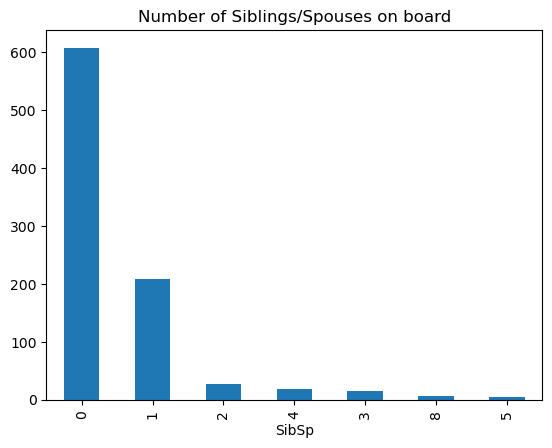

In [43]:
df['SibSp'].value_counts().plot(kind='bar')
plt.title('Number of Siblings/Spouses on board')

Sex
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

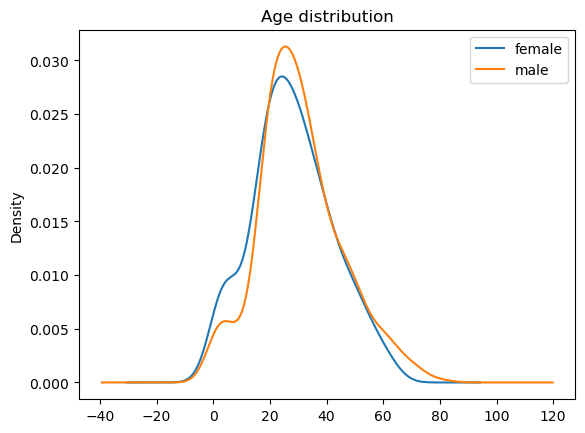

In [51]:
df.groupby('Sex')['Age'].plot.kde(legend=True, title='Age distribution')

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Fare, dtype: object

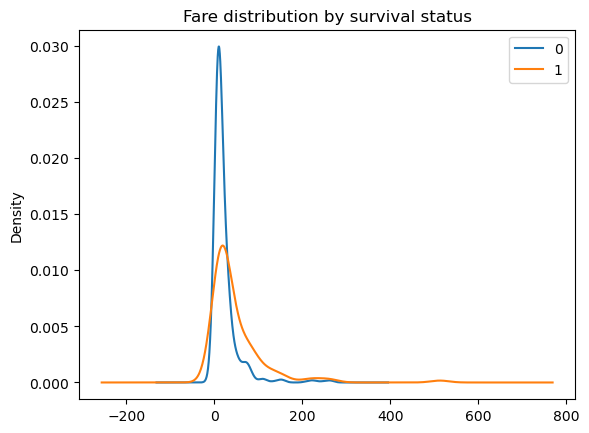

In [52]:
df.groupby('Survived')['Fare'].plot.kde(legend=True, title='Fare distribution by survival status')

<Axes: title={'center': 'Number of Parents/Children Aboard'}, ylabel='Density'>

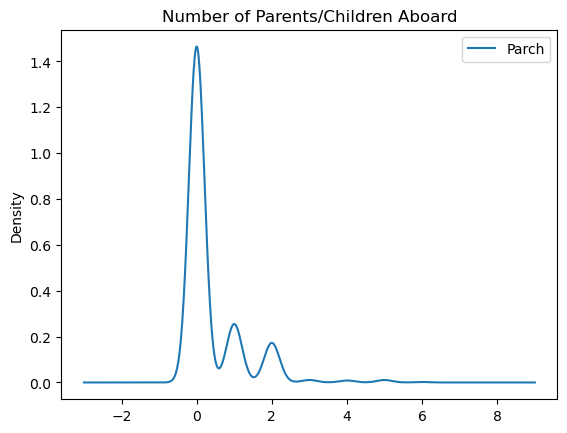

In [58]:
df['Parch'].plot.kde(legend=True, title='Number of Parents/Children Aboard')

<Axes: title={'center': 'Number of Siblings/Spouses on board'}, ylabel='Density'>

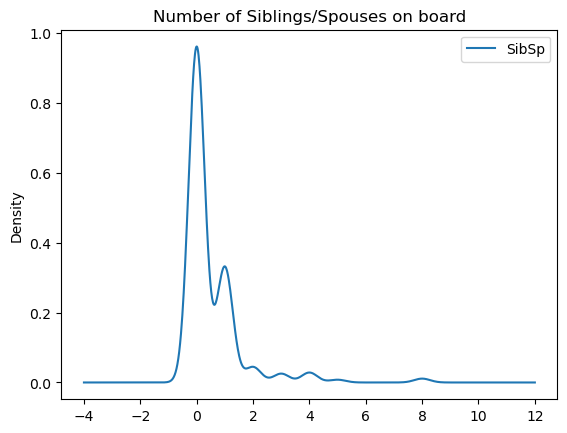

In [59]:
df['SibSp'].plot.kde(legend=True, title='Number of Siblings/Spouses on board')

e) Write down the formula for the KDE plot, assuming that the standard normal 
density function is selected for the kernel function.

$$
\hat{f}_h(x) = \frac{1}{n} \sum_{i=1}^{n} \mathcal{N}\left(x \mid x_i, h^2\right)
$$

Where:

- $\hat{f}_h(x)$ is the estimated density at point $x$
- $n$ is the number of data points
- $h$ is the bandwidth (smoothing parameter)
- $x_i$ are the observed data points

$\mathcal{N}\left(x \mid x_i, h^2\right)$ means the value of the normal PDF at $x$ with mean $x_i$ and variance $h^2$


## Part 2 – Time Series Data 

In [3]:
nvda= pd.read_csv('NVDA.csv')
print(nvda.head())

             timestamp      open      high     low     close  volume
0  2020-03-23 09:31:00  204.1600  204.1600  204.16  204.1600  568408
1  2020-03-23 09:32:00  204.3191  204.5065  200.56  200.7100   81709
2  2020-03-23 09:33:00  200.7299  206.1234  200.69  205.3801   59476
3  2020-03-23 09:34:00  205.4900  208.4999  204.12  207.7100   69771
4  2020-03-23 09:35:00  205.8200  205.8200  205.82  205.8200   57105


In [4]:
nvda['volatility']= abs(nvda['close']- nvda['open'])/ nvda['open']
nvda['volatility2'] = abs(nvda['high']- nvda['low'])/ nvda['low']

In [5]:
nvda['timestamp'] = pd.to_datetime(nvda['timestamp'])
grouped_nvda= nvda.groupby(pd.Grouper(key='timestamp', freq='5min'))

For each 5-min interval, create a histogram plot for total volume against the time 
of a day. (x axis – time, y axis – total volume). 

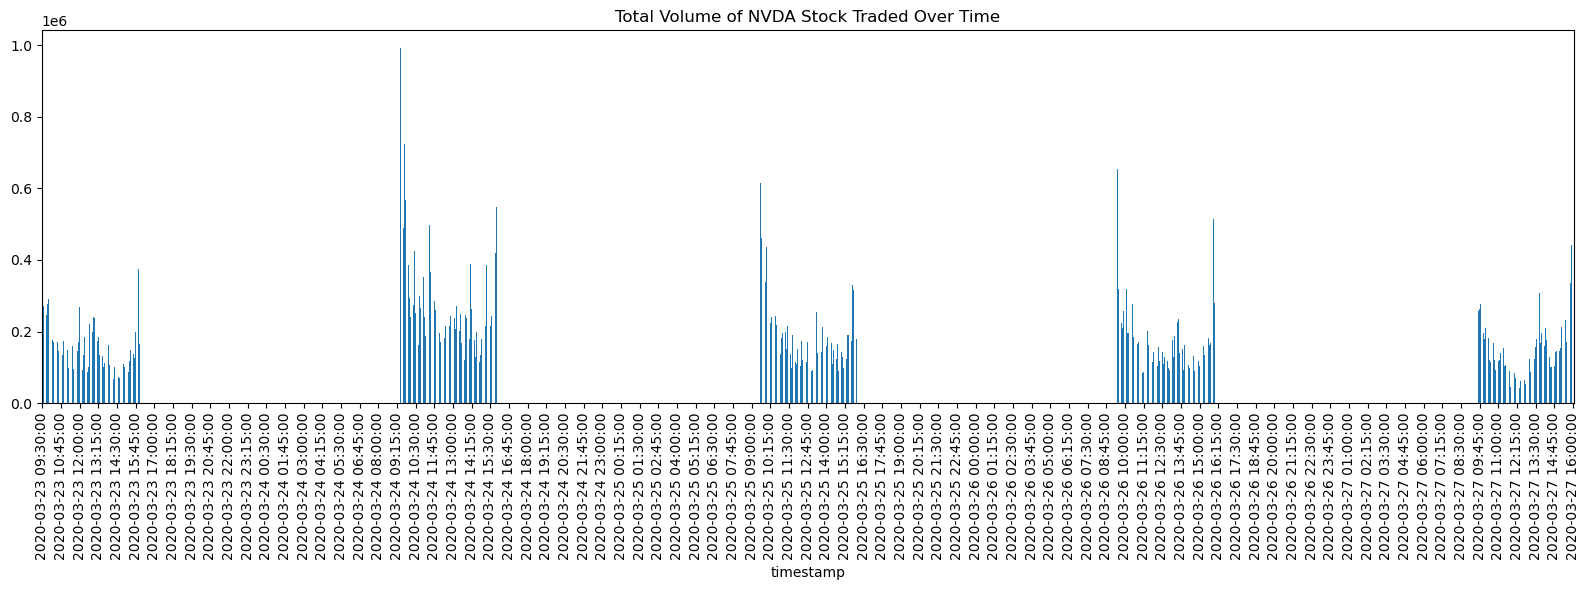

In [125]:
plt.figure(figsize=(16, 6))
ax = grouped_nvda['volume'].sum().plot(kind='bar')
plt.title('Total Volume of NVDA Stock Traded Over Time')

# Get the actual timestamps from the grouped data
xticks = [i for i in range(0, len(ax.get_xticklabels()), 15)]
xlabels = [str(label.get_text()) for i, label in enumerate(ax.get_xticklabels()) if i % 15 == 0]

plt.xticks(ticks=xticks, labels=xlabels, rotation=90)
plt.tight_layout()
plt.show()

b) Plot a line chart for the volatility of each time interval. (Volatility = abs(close – 
open) / open)

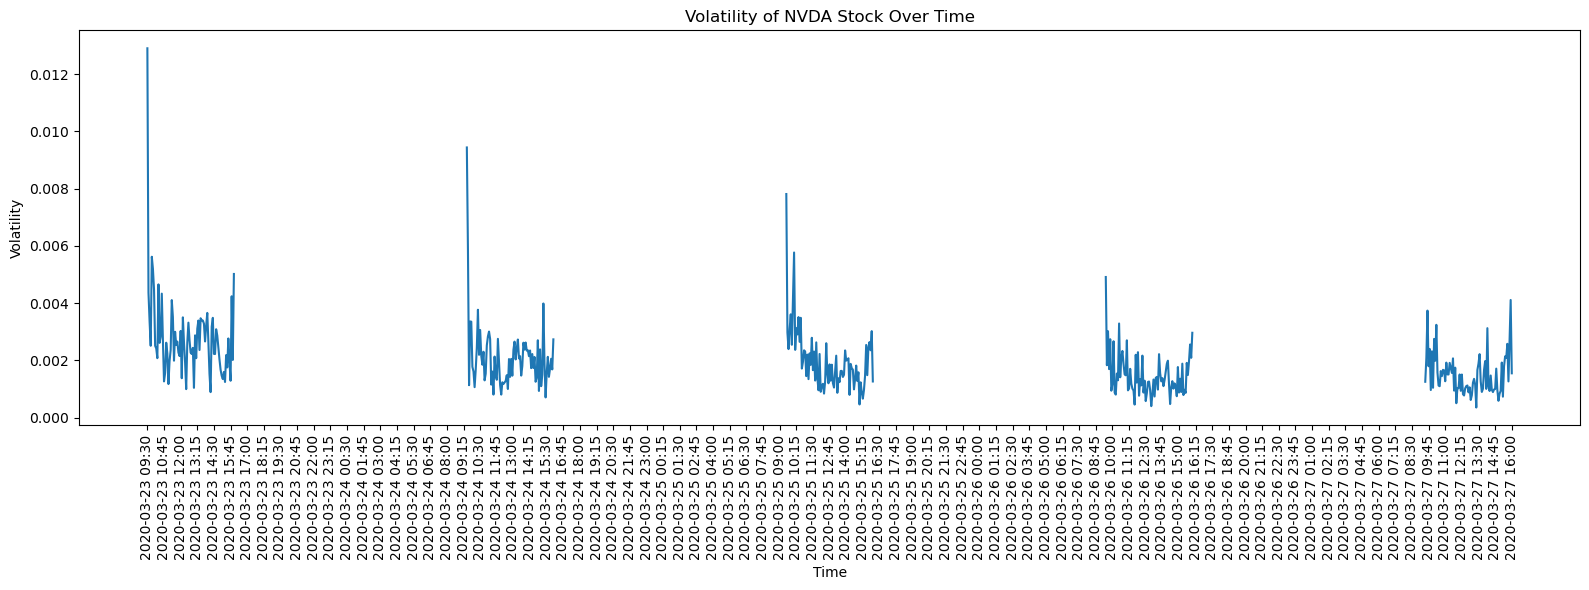

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(grouped_nvda['volatility'].mean().index, grouped_nvda['volatility'].mean())
ax.set_xlabel('Time')
ax.set_ylabel('Volatility')
ax.set_title('Volatility of NVDA Stock Over Time')

# Show every 20th tick only
ticks_to_show = grouped_nvda['volatility'].mean().index[::15]
ax.set_xticks(ticks_to_show)
ax.set_xticklabels([ts.strftime('%Y-%m-%d %H:%M') for ts in ticks_to_show], rotation=90)

plt.tight_layout()
plt.show()

c) Calculate two volatility time series using two different approaches: i) abs(close – 
open)/open, & ii) abs(high-low)/low, and plot the correlation between two series 
with a scatter plot. 

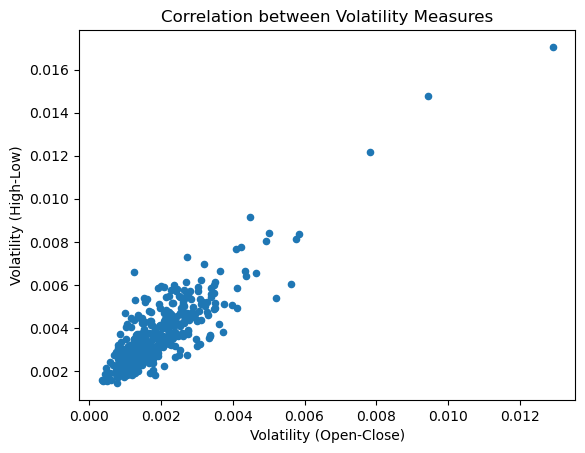

In [122]:
grouped_nvda.mean().plot.scatter(x='volatility', y='volatility2', title='Correlation between Volatility Measures')
plt.xlabel('Volatility (Open-Close)')
plt.ylabel('Volatility (High-Low)')
plt.show()